In [1]:
%load_ext autoreload
%autoreload 2

In [26]:
import numpy as np
import pandas as pd
from rad_sim.scm.graph_objects import Node

data = pd.DataFrame([])

n1 = Node(
    name='N1',
    parents=[],
    output_distribution='gaussian',
    dist_configs={
        'do_correction': False
    },
    dist_params_coefs={
        'mu_': {
            'bias': 2,
            'linear': np.array([]),
            'poly2': np.array([]),
            'interactions': np.array([]),
        },
        'sigma_': {
            'bias': 1,
            'linear': np.array([]),
            'poly2': np.array([]),
            'interactions': np.array([]),
        }
    }
)

data['N1'] = n1.sample(data, 1000)

,N1
0,3.471369
1,1.821891
2,0.581427
3,3.807195
4,3.814621
...,...
995,2.019718
996,1.746324
997,3.027281
998,2.118652


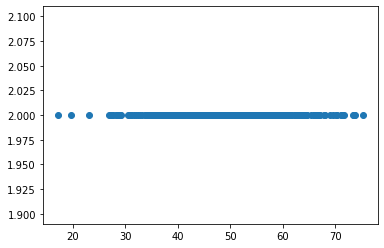

In [14]:
transformed = sigmoid_correction(p, center=False, upper=2)
transformed = np.round(transformed, 2)

plt.scatter(p, transformed)
plt.show()

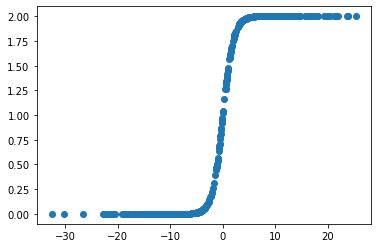

mean is: 1.04115


In [16]:
# center
transformed = sigmoid_correction(p, center=True, upper=2)
transformed = np.round(transformed, 2)

plt.scatter(p, transformed)
plt.show()
print('mean is:', transformed.mean())

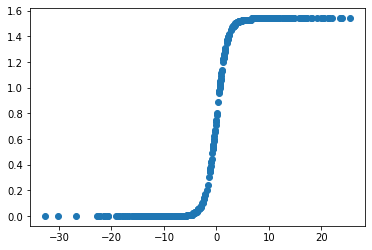

mean is: 0.8007249999999999


In [17]:
transformed = sigmoid_correction(
    p, center=False, upper=2, average=0.8
)
transformed = np.round(transformed, 2)

plt.scatter(p, transformed)
plt.show()
print('mean is:', transformed.mean())

In [124]:
from rad_sim.scm.utils import SigmoidCorrection

x = np.random.normal(9, 10, size=3000)

U = 3
L = 1

corrector = SigmoidCorrection(
    lower=L,
    upper=U,
    to_center=True,
    target_mean=1.9
)

out = corrector.transform(x)

print(out.mean())

1.3140818323013634
